# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and tensorflow.

In [9]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and Preprocess the Dataset
Load the dataset, drop null rows, and convert the date column to datetime format.

In [10]:
# Load and Preprocess the Dataset
# Load the dataset
df = pd.read_csv('dataset/sales_4.csv')

# Drop null rows
df.dropna(inplace=True)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample the data to monthly frequency, summing up the product_count
monthly_data = df['product_count'].resample('M').sum()

# Display the first few rows of the preprocessed data
monthly_data.head()

date
2021-01-31    127776
2021-02-28    133930
2021-03-31    154891
2021-04-30    153073
2021-05-31    142206
Freq: M, Name: product_count, dtype: int64

# Visualize the Data
Plot the product_count over time to visualize the data.

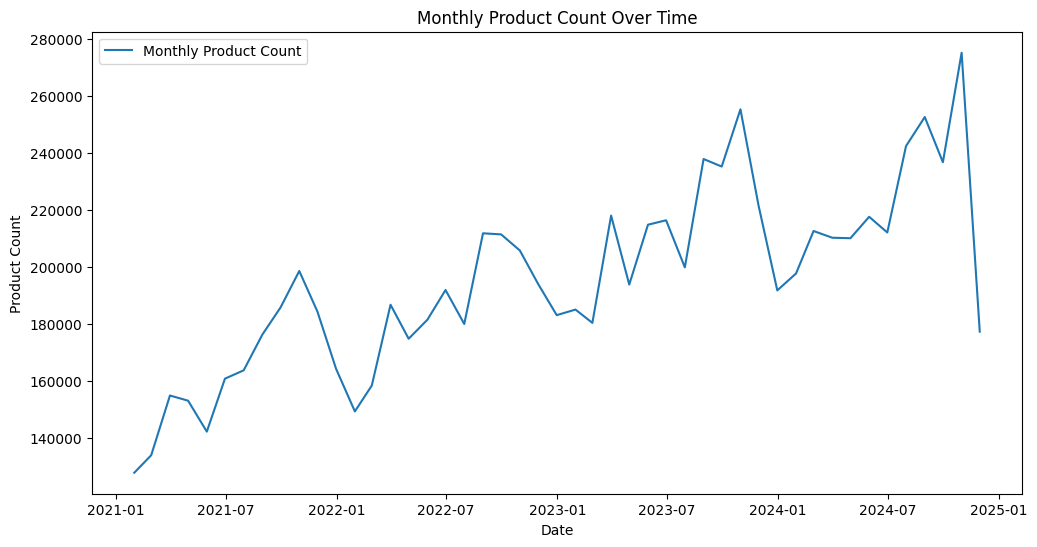

In [11]:
# Visualize the Data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Product Count')
plt.title('Monthly Product Count Over Time')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

# Prepare Data for LSTM Model
Resample the data to monthly frequency, normalize the data, and create sequences for the LSTM model.

In [12]:
# Prepare Data for LSTM Model

from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_data.values.reshape(-1, 1))

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 12  # Using 12 months to predict the next month

# Create sequences and labels
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 12, 1), (7, 12, 1), (28, 1), (7, 1))

# Build and Compile the LSTM Model
Build the LSTM model using TensorFlow/Keras and compile it with appropriate loss function and optimizer.

In [13]:
# Build and Compile the LSTM Model

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# Train the LSTM Model
Train the LSTM model using the training data.

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0162 - val_loss: 0.0514
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0176 - val_loss: 0.0518
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0140 - val_loss: 0.0518
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0195 - val_loss: 0.0514
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0150 - val_loss: 0.0505
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0205 - val_loss: 0.0493
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0168 - val_loss: 0.0481
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0158 - val_loss: 0.0469
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0201 - val_loss: 0.0457
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0137 - val_loss: 0.0447
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0147 - val_loss: 0.0439
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0161 - val_lo

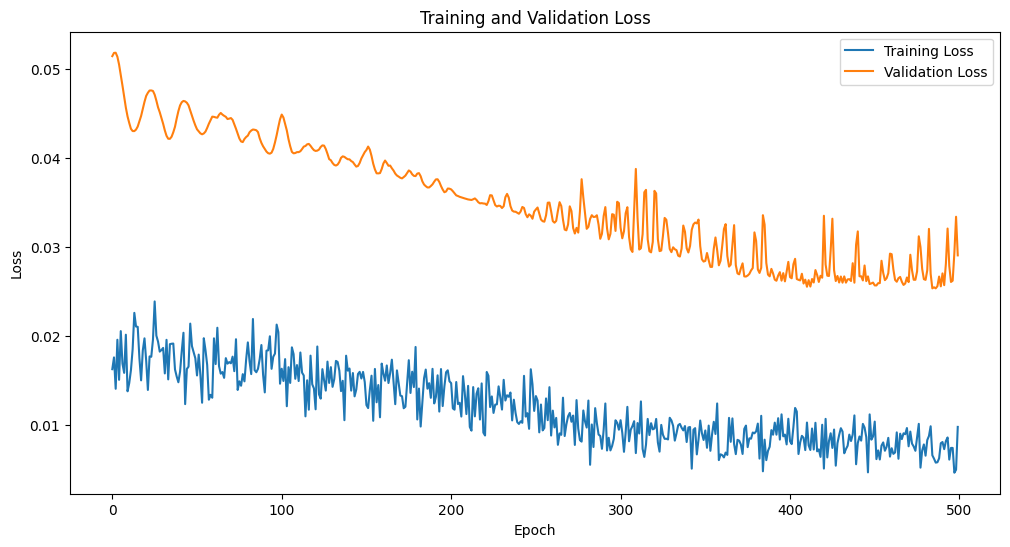

In [ ]:
# Train the LSTM Model

# Train the model using the training data
history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions
Use the trained LSTM model to make predictions for the months after the dataset ends.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


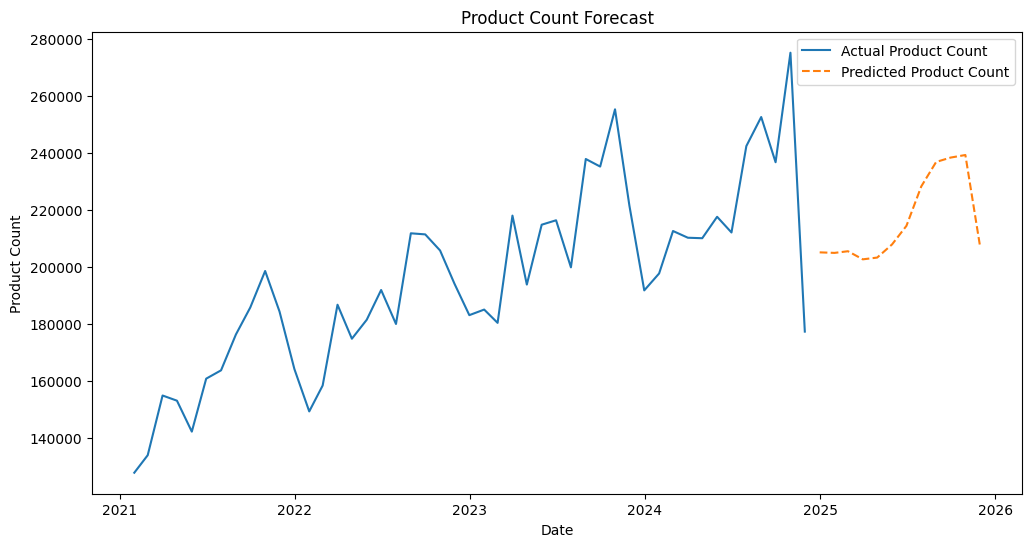

In [18]:
# Make Predictions

# Use the trained LSTM model to make predictions for the months after the dataset ends

# Predict the next 12 months
def predict_future(model, data, sequence_length, num_predictions):
    predictions = []
    current_sequence = data[-sequence_length:]
    for _ in range(num_predictions):
        prediction = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], [[prediction]], axis=0)
    return predictions

# Number of months to predict
num_predictions = 12

# Predict future values
future_predictions = predict_future(model, scaled_data, sequence_length, num_predictions)

# Inverse transform the predictions to get actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions
last_date = monthly_data.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=num_predictions, freq='M')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['product_count'])

# Plot the actual data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Product Count')
plt.plot(future_df, label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

# Visualize the Predictions
Plot the actual and predicted product_count to visualize the performance of the model.

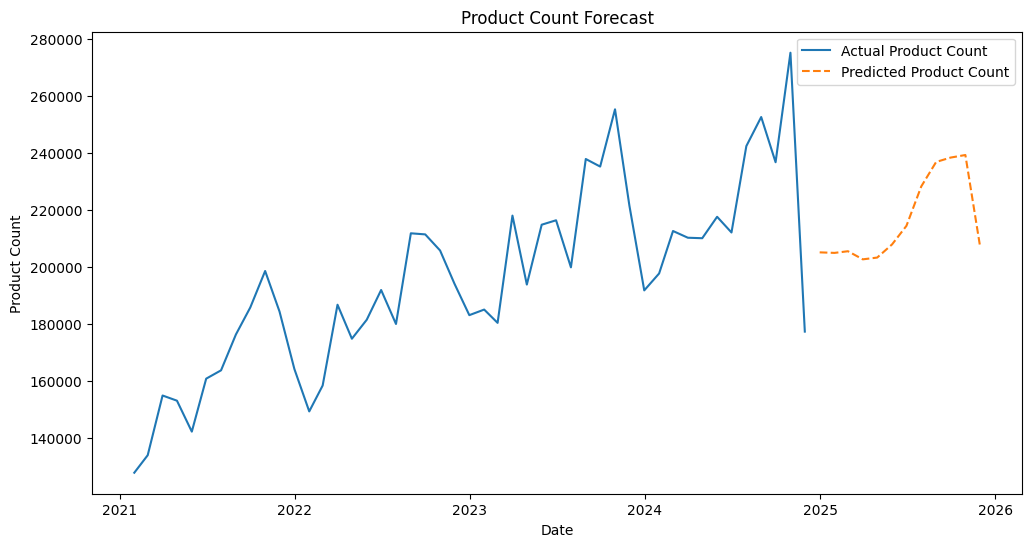

In [19]:
# Visualize the Predictions

# Plot the actual data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Product Count')
plt.plot(future_df, label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()